In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
conn = sqlite3.connect('../data/sql_data/NYC_bikes_2018.sqlite')
cur = conn.cursor()

In [3]:
%load_ext sql
%sql sqlite:///../data/sql_data/NYC_bikes_2018.sqlite

'Connected: @../data/sql_data/NYC_bikes_2018.sqlite'

In [4]:
%%sql
SELECT * FROM sqlite_master WHERE "type"='table';

 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,usertypes,usertypes,2,"CREATE TABLE usertypes (ID INTEGER PRIMARY KEY NOT NULL, usertype TEXT)"
table,trips,trips,285098,"CREATE TABLE ""trips"" (""tripduration"" INTEGER, ""starttime"" TIMESTAMP, ""stoptime"" TIMESTAMP, ""start_station_id"" INTEGER, ""end_station_id"" INTEGER, ""bikeid"" INTEGER, ""usertype"" INTEGER, ""birth_year"" INTEGER, ""gender"" INTEGER)"
table,stations,stations,327611,"CREATE TABLE ""stations"" (""station_id"" INTEGER, ""lat"" REAL, ""lon"" REAL, ""station_name"" TEXT)"


In [5]:
%%sql
SELECT starttime, strftime('%H',starttime) FROM trips LIMIT 1

 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


starttime,"strftime('%H',starttime)"
2018-01-01 13:50:57.434000,13


In [6]:
%%sql
WITH test_trips AS (SELECT * FROM trips LIMIT 10)

SELECT 
    start_station_id,
    end_station_id,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('23','00','01','02','03','04') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS LN,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('05','06','07','08','09','10') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS MC,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('11','12','13','14','15','16') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS DT,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('17','18','19','20','21','22') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS EC,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21') AND strftime('%w', starttime) IN ('0','6') THEN 1 
             ELSE 0 
           END) AS WED,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('22','23','00','01','02','03','04','05') AND strftime('%w', starttime) IN ('0','6') THEN 1 
             ELSE 0 
           END) AS WEN,
    (SELECT lat FROM stations WHERE station_id = test_trips.start_station_id) AS ss_lat,
    (SELECT lon FROM stations WHERE station_id = test_trips.start_station_id) AS ss_lon,
    (SELECT lat FROM stations WHERE station_id = test_trips.end_station_id) AS es_lat,
    (SELECT lon FROM stations WHERE station_id = test_trips.end_station_id) AS es_lon
FROM test_trips
WHERE start_station_id != end_station_id
GROUP BY  start_station_id, end_station_id


 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


start_station_id,end_station_id,LN,MC,DT,EC,WED,WEN,ss_lat,ss_lon,es_lat,es_lon
72,173,0,1,0,0,0,0,40.76727216,-73.99392888,40.76068327096592,-73.98452728986742
72,228,0,1,0,0,0,0,40.76727216,-73.99392888,40.7546011026,-73.971878855
72,447,0,0,1,0,0,0,40.76727216,-73.99392888,40.76370739,-73.9851615
72,450,0,1,0,0,0,0,40.76727216,-73.99392888,40.76227205,-73.98788205
72,479,0,1,0,0,0,0,40.76727216,-73.99392888,40.76019252,-73.9912551
72,482,0,0,0,1,0,0,40.76727216,-73.99392888,40.73935542,-73.99931783
72,505,0,0,1,0,0,0,40.76727216,-73.99392888,40.74901271,-73.98848395
72,525,0,0,1,0,0,0,40.76727216,-73.99392888,40.75594159,-74.0021163
72,3255,0,0,1,0,0,0,40.76727216,-73.99392888,40.7505853470215,-73.9946848154068
72,3356,0,0,0,1,0,0,40.76727216,-73.99392888,40.7746671,-73.98470567


In [ ]:
%%sql
SELECT COUNT(*) FROM trips

In [21]:
query = '''SELECT 
    start_station_id,
    end_station_id,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('22','23','00','01','02','03') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS LN,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('04','05','06','07','08','09') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS MC,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('10','11','12','13','14','15') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS DT,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('16','17','18','19','20','21') AND strftime('%w', starttime) IN ('1','2','3','4','5') THEN 1 
             ELSE 0 
           END) AS EC,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21') AND strftime('%w', starttime) IN ('0','6') THEN 1 
             ELSE 0 
           END) AS WED,
    SUM(CASE 
             WHEN strftime('%H', starttime) IN ('22','23','00','01','02','03','04','05') AND strftime('%w', starttime) IN ('0','6') THEN 1 
             ELSE 0 
           END) AS WEN,
    (SELECT lat FROM stations WHERE station_id = trips.start_station_id) AS ss_lat,
    (SELECT lon FROM stations WHERE station_id = trips.start_station_id) AS ss_lon,
    (SELECT lat FROM stations WHERE station_id = trips.end_station_id) AS es_lat,
    (SELECT lon FROM stations WHERE station_id = trips.end_station_id) AS es_lon
FROM trips
WHERE start_station_id != end_station_id
GROUP BY  start_station_id, end_station_id'''

In [22]:
pd.read_sql_query(query, conn)

,start_station_id,end_station_id,LN,MC,DT,EC,WED,WEN,ss_lat,ss_lon,es_lat,es_lon
0,72,79,1,4,13,24,8,0,40.767272,-73.993929,40.719116,-74.006667
1,72,82,0,0,0,1,0,0,40.767272,-73.993929,40.711174,-74.000165
2,72,127,1,68,80,55,38,6,40.767272,-73.993929,40.731724,-74.006744
3,72,128,0,5,15,12,33,1,40.767272,-73.993929,40.727103,-74.002971
4,72,146,1,3,7,8,12,0,40.767272,-73.993929,40.716250,-74.009106
5,72,150,1,0,0,13,0,0,40.767272,-73.993929,40.720874,-73.980858
6,72,151,2,4,14,8,26,1,40.767272,-73.993929,40.722104,-73.997249
7,72,152,0,0,0,3,2,0,40.767272,-73.993929,40.714740,-74.009106
8,72,161,0,24,5,7,2,0,40.767272,-73.993929,40.729170,-73.998102
9,72,164,0,13,14,5,6,1,40.767272,-73.993929,40.753231,-73.970325


In [24]:
hourly_trips_df = __

In [27]:
hourly_trips_df['LN'].sum(), hourly_trips_df['MC'].sum(), hourly_trips_df['DT'].sum(), hourly_trips_df['EC'].sum()

(660092, 3432214, 3551532, 5420389)

In [10]:
hourly_trips_df.to_pickle('../data/pickles/hourly_trips_2018_df.pkl')

In [11]:
hourly_trips_df = pd.read_pickle('../data/pickles/hourly_trips_2018_df.pkl')

In [18]:
hourly_trips_df['MC'].max()

3550

In [35]:
hourly_trips_df['dist'] = np.sqrt((hourly_trips_df['ss_lat']-hourly_trips_df['es_lat'])**2 + 0.425*(hourly_trips_df['ss_lon']-hourly_trips_df['es_lon'])**2)
hourly_trips_df['tot_dist_LN'] = hourly_trips_df['LN']*hourly_trips_df['dist']
hourly_trips_df['tot_dist_MC'] = hourly_trips_df['MC']*hourly_trips_df['dist']
hourly_trips_df['tot_dist_DT'] = hourly_trips_df['DT']*hourly_trips_df['dist']
hourly_trips_df['tot_dist_EC'] = hourly_trips_df['EC']*hourly_trips_df['dist']
hourly_trips_df['tot_dist_WED'] = hourly_trips_df['WED']*hourly_trips_df['dist']
hourly_trips_df['tot_dist_WEN'] = hourly_trips_df['WEN']*hourly_trips_df['dist']

In [36]:
hourly_trips_df.head()

,start_station_id,end_station_id,LN,MC,DT,EC,WED,WEN,ss_lat,ss_lon,es_lat,es_lon,dist,tot_dist_LN,tot_dist_MC,tot_dist_DT,tot_dist_EC,tot_dist_WED,tot_dist_WEN
0,72,79,1,4,13,24,8,0,40.767272,-73.993929,40.719116,-74.006667,0.048867,0.048867,0.195469,0.635276,1.172816,0.390939,0.000000
1,72,82,0,0,0,1,0,0,40.767272,-73.993929,40.711174,-74.000165,0.056245,0.000000,0.000000,0.000000,0.056245,0.000000,0.000000
2,72,127,1,68,80,55,38,6,40.767272,-73.993929,40.731724,-74.006744,0.036516,0.036516,2.483120,2.921317,2.008406,1.387626,0.219099
3,72,128,0,5,15,12,33,1,40.767272,-73.993929,40.727103,-74.002971,0.040600,0.000000,0.202999,0.608997,0.487197,1.339793,0.040600
4,72,146,1,3,7,8,12,0,40.767272,-73.993929,40.716250,-74.009106,0.051973,0.051973,0.155918,0.363808,0.415781,0.623671,0.000000


In [91]:
def get_avg_dist_and_tot(trips_df, key):
    ss_gb = trips_df.groupby('start_station_id')
    es_gb = trips_df.groupby('end_station_id')
    
    tot_dist = ss_gb['tot_dist_{}'.format(key)].sum() + es_gb['tot_dist_{}'.format(key)].sum()
    tot_rides = ss_gb[key].sum() + es_gb[key].sum()
    
    
    return tot_dist/tot_rides, tot_rides

In [92]:
query = '''
SELECT station_id, lat, lon FROM stations'''
stations_df = pd.read_sql_query(query, conn)

stations_df.set_index('station_id',inplace=True)

In [93]:
stations_df['avg_dist_LN'], stations_df['tot_trips_LN'] = get_avg_dist_and_tot(hourly_trips_df, 'LN')
stations_df['avg_dist_MC'], stations_df['tot_trips_MC'] = get_avg_dist_and_tot(hourly_trips_df, 'MC')
stations_df['avg_dist_DT'], stations_df['tot_trips_DT'] = get_avg_dist_and_tot(hourly_trips_df, 'DT')
stations_df['avg_dist_EC'], stations_df['tot_trips_EC'] = get_avg_dist_and_tot(hourly_trips_df, 'EC')
stations_df['avg_dist_WED'], stations_df['tot_trips_WED'] = get_avg_dist_and_tot(hourly_trips_df, 'WED')
stations_df['avg_dist_WEN'], stations_df['tot_trips_WEN'] = get_avg_dist_and_tot(hourly_trips_df, 'WEN')


In [107]:
stations_df.head()

,lat,lon,avg_dist_LN,tot_trips_LN,avg_dist_MC,tot_trips_MC,avg_dist_DT,tot_trips_DT,avg_dist_EC,tot_trips_EC,avg_dist_WED,tot_trips_WED,avg_dist_WEN,tot_trips_WEN
station_id,,,,,,,,,,,,,,
72,40.767272,-73.993929,0.019637,2972.0,0.020841,14761.0,0.020251,15312.0,0.023418,23130.0,0.023873,17627.0,0.020453,1325.0
79,40.719116,-74.006667,0.015682,1491.0,0.016599,10354.0,0.014186,13138.0,0.016211,17330.0,0.014502,10495.0,0.014366,822.0
82,40.711174,-74.000165,0.012578,852.0,0.011117,3287.0,0.010486,4502.0,0.011338,6103.0,0.010548,4790.0,0.011155,402.0
83,40.683826,-73.976323,0.013386,1259.0,0.012957,5264.0,0.013168,5185.0,0.012835,7641.0,0.013522,6614.0,0.012618,529.0
119,40.696089,-73.978034,0.011415,246.0,0.012406,1561.0,0.010457,1805.0,0.011222,1982.0,0.014160,1143.0,0.012047,136.0


In [94]:
len(stations_df), len(stations_df.dropna(inplace=True))

In [108]:
stations_df.to_pickle('../data/pickles/hourly_bike_traffic_params.pkl')

In [ ]:
stations_df.head()

In [ ]:
stations_df.dropna(inplace = True)
stations_df.head()

In [ ]:
null_ind = stations_df[stations_df['avg_dist'].isnull()].index
trips_df.set_index('end_station_id').loc[null_ind]

In [60]:
def bike_traffic(df, tup):
    dists = df['tot_trips']*np.exp(-((df['lat'] - tup[0])**2 + .425*(df['lon'] - tup[1])**2)/df['avg_dist']**2)
    return dists.sum()


#stations_df = pd.read_pickle('../data/pickles/bike_traffic_params.pkl')

NameError: name 'stations_df' is not defined

## Heatmap of bike traffic intensity

In [97]:
bb = [[stations_df['lat'].min()-.01,stations_df['lat'].max()+.01],[stations_df['lon'].min()-.01,stations_df['lon'].max()+.01]]
bb

[[40.645399774478314, 40.82439443791581], [-74.02713445, -73.8977436]]

In [109]:
def bike_traffic_test(df, key, arr1, arr2):
    z = np.zeros(shape=(arr1.size,arr2.size))
    for iy, y in enumerate(arr1):
        for ix, x in enumerate(arr2):
            z[iy,ix] = (df['tot_trips_{}'.format(key)]*np.exp(-((df['lat'] - y)**2 + .425*(df['lon'] - x)**2)*8/df['avg_dist_{}'.format(key)]**2)).sum()
    return z

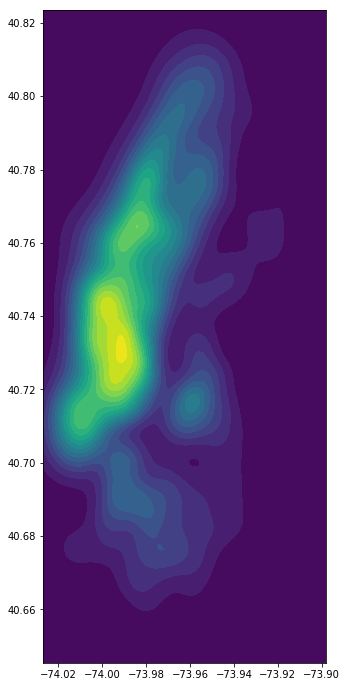

In [110]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'WED',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

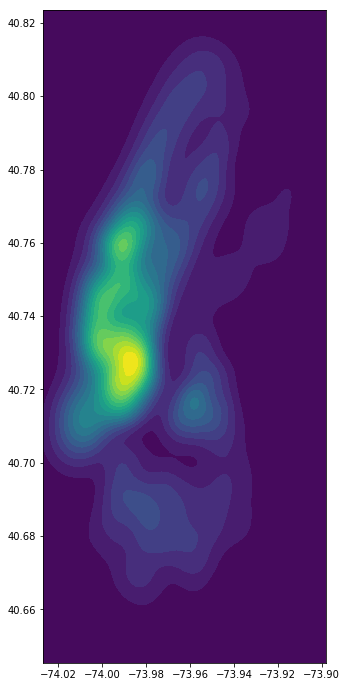

In [115]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'WEN',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

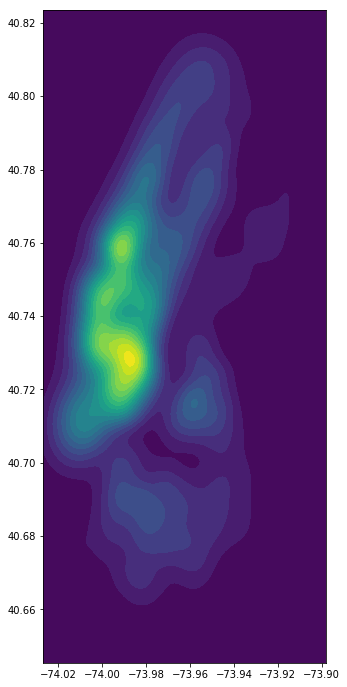

In [111]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'LN',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

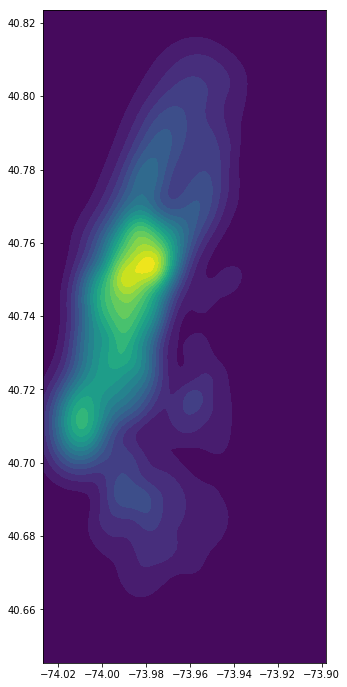

In [114]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'MC',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

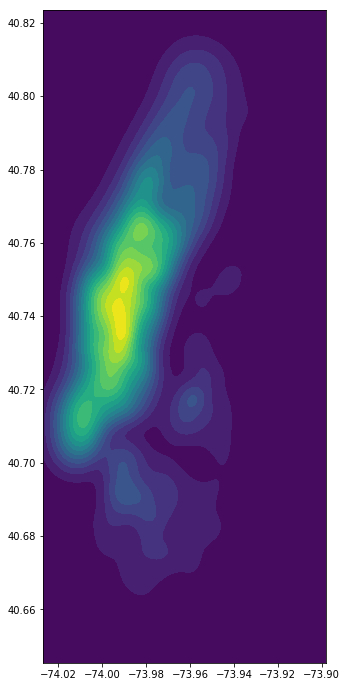

In [112]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'DT',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

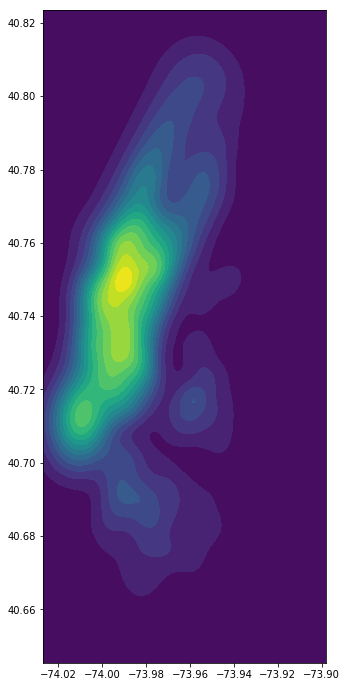

In [113]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,'EC',y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

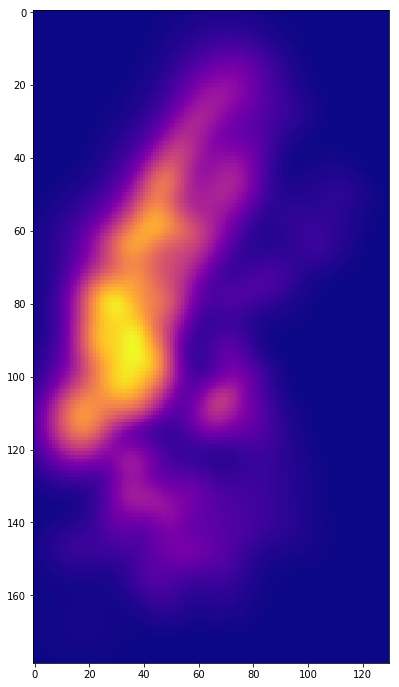

In [106]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
ax.set_aspect(0.1)
plt.imshow(np.flip(z,axis=0), cmap='plasma',interpolation='nearest', aspect = 4/3)
plt.savefig('../Images/MC_bike_traffic_2018_est.png')
plt.show()